HIC	High income
INX	Not classified
LIC	Low income
LMC	Lower middle income
LMY	Low & middle income
MIC	Middle income
UMC	Upper middle income
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4740 entries, (Aruba, 2019-01-01 00:00:00) to (Virgin Islands (U.S.), 1960-01-01 00:00:00)
Data columns (total 2 columns):
doing_business    287 non-null float64
gdppc             1736 non-null float64
dtypes: float64(2)
memory usage: 84.5+ KB


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import chart_studio.plotly as py
import matplotlib.pyplot as plt
import Regress
from matplotlib import style
%matplotlib inline

from kaggle.api.kaggle_api_extended import KaggleApi
from zipfile import ZipFile
import os
api = KaggleApi()
api.authenticate()

api.dataset_download_file('smid80/weatherww2','Summary of Weather.csv')
with ZipFile('Summary%20of%20Weather.csv.zip','r') as zipObj:
    zipObj.extractall()
    
import os

os.remove("Summary%20of%20Weather.csv.zip")

DF = pd.read_csv('Summary of Weather.csv')


/home/nazirnayal/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning:

Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.



In [7]:
def plot_feature_against(df,col_list,target):
    
    plt.figure(figsize = (10,14))
    i = 0
    for col in col_list:
        if col == target:
            continue
        i += 1
        plt.subplot(8,3,i)
        plt.plot(df[col],df[target],marker = '.', linestyle = 'none')
        plt.title("%s vs %s"%(target,col))
        plt.tight_layout()

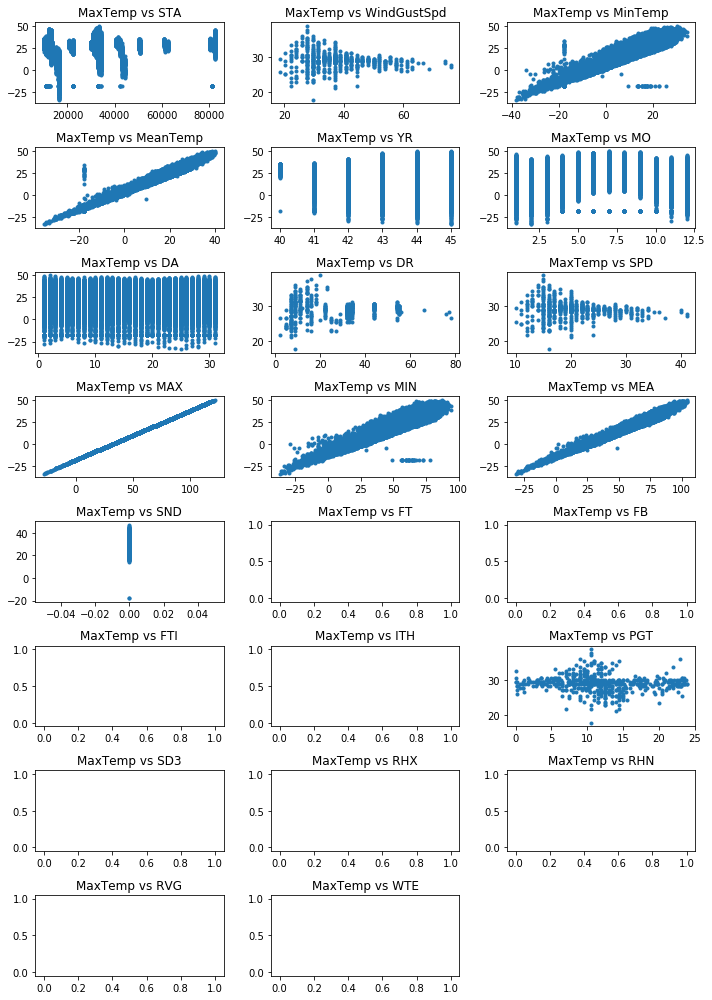

In [8]:
from pandas.api.types import is_numeric_dtype
cols = DF.columns
col_list = []
for c in cols:
    if is_numeric_dtype(DF[c]):
        col_list.append(c)
plot_feature_against(DF,col_list,'MaxTemp')

In [4]:
Sample = DF.sample(n = 200, replace = False)

X = Sample[['MaxTemp']]
Y = Sample['MinTemp']
Beta, Sigma, CI_L,CI_R = Regress.Regress(X,Y.values)
print(Beta)
print(Sigma)
print(CI_L)
print(CI_R)

[-5.08002654  0.85123798]
[1.08374288 0.03758067]
[-7.2475123   0.77607665]
[-2.91254077  0.92639932]


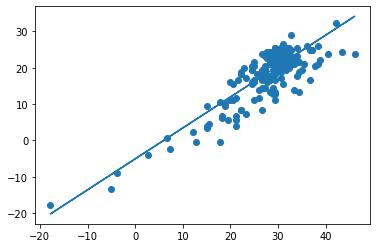

In [5]:
plt.scatter(X,Y)
plt.plot(X,Beta[0] + Beta[1] * X)

In [17]:
Error1 = [Beta[0] - CI_L[0]]
Error2 = [Beta[1] - CI_L[1]]
plt.errorbar([Beta[0]] ,[Beta[0]] ,yerr = Error1, fmt = '.k')
plt.errorbar([Beta[1]] ,[Beta[1]] ,yerr = Error2, fmt = '.k')

plt.plot([-10,10],[0,0],'--')
plt.scatter([Beta[0],Beta[1]],[(CI_L[0] + CI_R[0])/2,(CI_L[1] + CI_R[1])/2])

[-4.20873708  0.82113976]
[0.96202455 0.03368384]
[-6.13278619  0.75377208]
[-2.28468798  0.88850743]


In [7]:
plt.plot([Beta[0] ,Beta[0]], [CI_L[0] ,CI_R[0]], linewidth = 1)
plt.plot([Beta[1] ,Beta[1]], [CI_L[1] ,CI_R[1]], linewidth = 1)
plt.plot([-10,10],[0,0],'--')
plt.scatter([Beta[0],Beta[1]],[(CI_L[0] + CI_R[0])/2,(CI_L[1] + CI_R[1])/2])


NameError: name 'plot_feature_against' is not defined

[-6.48183261  0.905556  ]
[0.7970834  0.02841468]
[-8.07599942  0.84872663]
[-4.88766581  0.96238536]


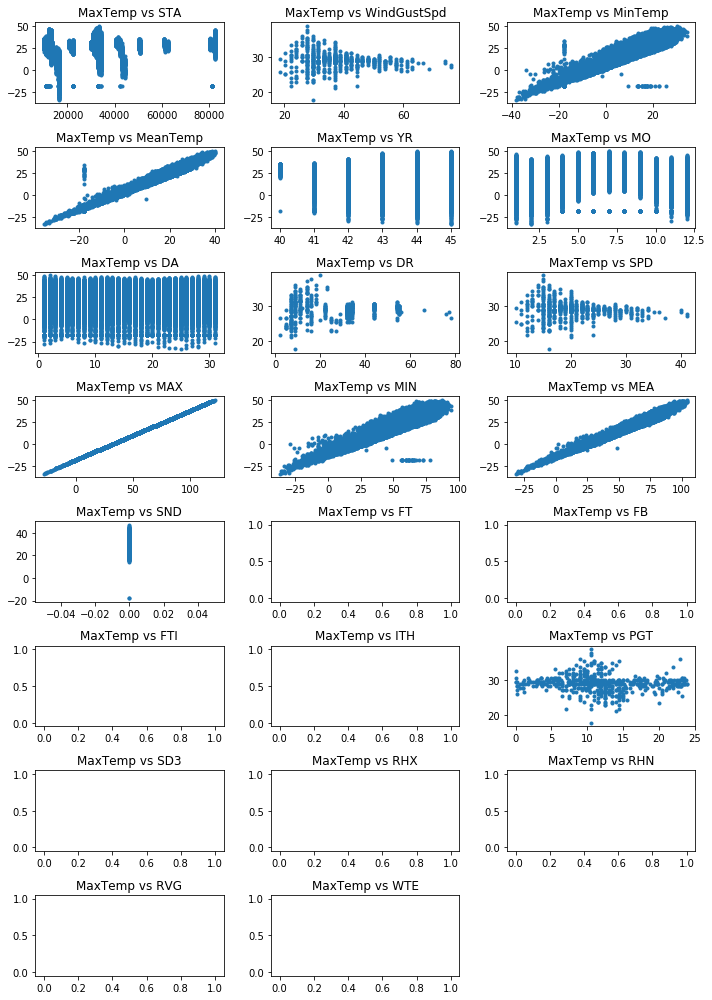

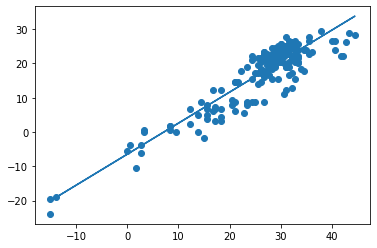

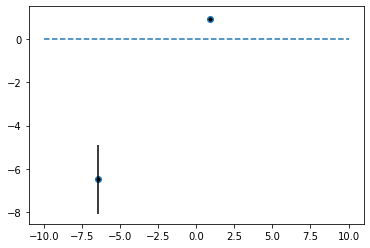

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import chart_studio.plotly as py
import matplotlib.pyplot as plt
import Regress
from matplotlib import style
from pandas.api.types import is_numeric_dtype
import os
%matplotlib inline

# get data from kaggle api
from kaggle.api.kaggle_api_extended import KaggleApi
from zipfile import ZipFile
import os
api = KaggleApi()
api.authenticate()

# data will be downloaded as a zip file to we shall unzip it
api.dataset_download_file('smid80/weatherww2','Summary of Weather.csv')
with ZipFile('Summary%20of%20Weather.csv.zip','r') as zipObj:
    zipObj.extractall()
    
# remove zip file once contents are extracted
os.remove("Summary%20of%20Weather.csv.zip")

# read data as csv
DF = pd.read_csv('Summary of Weather.csv')

# this function is used to explore the data
def plot_feature_against(df,col_list,target):
    
    plt.figure(figsize = (10,14))
    i = 0
    for col in col_list:
        if col == target:
            continue
        i += 1
        plt.subplot(8,3,i)
        plt.plot(df[col],df[target],marker = '.', linestyle = 'none')
        plt.title("%s vs %s"%(target,col))
        plt.tight_layout()


# extract numerical columns to test against one another
cols = DF.columns
col_list = []
for c in cols:
    if is_numeric_dtype(DF[c]):
        col_list.append(c)
plot_feature_against(DF,col_list,'MaxTemp')


# extract a sample of 200 points and run regression
Sample = DF.sample(n = 200, replace = False)

X = Sample[['MaxTemp']]
Y = Sample['MinTemp']

Beta, Sigma, CI_L,CI_R = Regress.Regress(X,Y.values)
print(Beta)
print(Sigma)
print(CI_L)
print(CI_R)

plt.figure()
# plot the points and regression lines
plt.scatter(X,Y)
plt.plot(X,Beta[0] + Beta[1] * X)


plt.figure()
# plot confidence intervals
Error1 = [Beta[0] - CI_L[0]]
Error2 = [Beta[1] - CI_L[1]]
plt.errorbar([Beta[0]] ,[Beta[0]] ,yerr = Error1, fmt = '.k')
plt.errorbar([Beta[1]] ,[Beta[1]] ,yerr = Error2, fmt = '.k')

plt.plot([-10,10],[0,0],'--')
plt.scatter([Beta[0],Beta[1]],[(CI_L[0] + CI_R[0])/2,(CI_L[1] + CI_R[1])/2])



In [1]:
plt.plot([Beta[0] ,Beta[0]], [CI_L[0] ,CI_R[0]])
plt.plot([Beta[1] ,Beta[1]], [CI_L[1] ,CI_R[1]])
plt.plot([-10,10],[0,0],'--')
plt.scatter([Beta[0],Beta[1]],[(CI_L[0] + CI_R[0])/2,(CI_L[1] + CI_R[1])/2])

NameError: name 'plt' is not defined

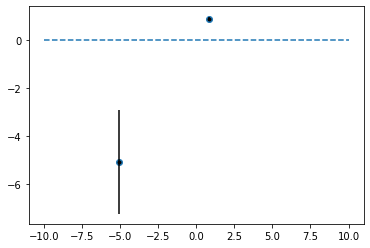

In [80]:
def plot_feature_against(df,col_list,target):
    
    plt.figure(figsize = (10,14))
    i = 0
    for col in col_list:
        if col == target:
            continue
        i += 1
        plt.subplot(8,3,i)
        plt.plot(df[col],df[target],marker = '.', linestyle = 'none')
        plt.title("%s vs %s"%(target,col))
        plt.tight_layout()

In [2]:
import numpy as np
import pandas as pd

def Regress(DF_X,Y):
    # Drop the na rows and reset the index of the rows
    
    if not isinstance(DF_X,pd.DataFrame):
        print("X Must be a Data Frame")
        return (-1,-1,-1,-1)
    
    if not isinstance(Y,np.ndarray):
        print("Y must be a numpy array")
        return (-1,-1,-1,-1)
    
    DF_X = DF_X.dropna()
    DF_X = DF_X.reset_index(drop = True)
    
    if DF_X.empty:
        print("X is empty")
        return (-1,-1,-1,-1)
    
    # turn dataframe to numpy array
    X = DF_X.values
    
    # store the number of data points and independent variables
    N = X.shape[0] 
    K = X.shape[1]   
    
    if N != Y.shape[0]:
        print("Y must be of same number of rows of X")
        return (-1,-1,-1,-1)
    
    # stack a column of ones to the beginning of the numpy array
    X = np.column_stack([np.ones(N), X])
    
    # calculate the estimates
    Beta = np.matmul(X.transpose(),X)
    Beta = np.linalg.inv(Beta)
    Beta = np.matmul(Beta,X.transpose())
    Beta = np.matmul(Beta,Y.transpose())
    
    # calculate error or residual vector
    Error = Y - np.matmul(X,Beta.transpose())
    
    # calculate standard error
    STD_ERR = np.matmul(Error.transpose(),Error)
    STD_ERR = STD_ERR / (N - K - 1) 
    
    # calculate standard error of coefficients
    VarBeta = STD_ERR * np.linalg.inv(np.matmul(X.transpose(),X))
    Beta_STD_Err = np.sqrt(VarBeta.diagonal())
        
    # caclculate confidence interval
    CI_L = Beta - 2 * Beta_STD_Err
    CI_R = Beta + 2 * Beta_STD_Err
    
    # return a tuple of (estimates,standard error,left bounds of CI,right bounds od CI)
    return (Beta,Beta_STD_Err,CI_L,CI_R)
    


In [41]:
# This data has been used to validate the correctness of the function above
# Here is the link https://datatofish.com/multiple-linear-regression-python/
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }
df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

Y = df['Stock_Index_Price']
X = df[['Interest_Rate','Unemployment_Rate']]

Beta, Sigma, CI_L, CI_R = Regress(X,Y.values)

print(Beta)
print(Sigma)
print(CI_L)
print(CI_R)


[1798.40397763  345.54008701 -250.14657137]
[899.248075   111.36692223 117.94986892]
[-9.21723677e-02  1.22806243e+02 -4.86046309e+02]
[3596.90012762  568.27393146  -14.24683354]


In [39]:
print(type(np.array([1,2])))

<class 'numpy.ndarray'>


In [53]:
import math
Map = {
    'c1': [math.nan,math.nan],
    'c2': [math.nan,math.nan],
    'c3': [math.nan,math.nan]
    }
DF = pd.DataFrame(Map,columns = ['c1','c2','c3'])
Y = np.array([1,1])
print(Regress(DF,Y))

X is empty
(-1, -1, -1, -1)
